In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [7]:
# 뉴스 카테고리 데이터
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [8]:
print(x_train.shape, x_test.shape)

(8982,) (2246,)


In [9]:
print(y_train.shape, y_test.shape)

(8982,) (2246,)


In [7]:
x_train[:3]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [10]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [12]:
np.max(y_train)+1  # 46개의 뉴스 카테고리

46

In [ ]:
np.unique(y_train)

In [13]:
# 기사의 단어길이
print([len(word) for word in x_train])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64, 409, 92, 319, 166, 85, 200, 152, 474, 60, 58, 584, 71, 273, 51, 255, 28, 171, 143, 91, 46, 110, 77, 162, 24, 52, 175, 61, 95, 97, 259, 112, 73, 94, 17, 650, 23, 88, 309, 105, 89, 41, 314, 54, 374, 67, 160, 75, 207, 373, 84, 87, 74, 98, 136, 256, 95, 50, 108, 52, 100, 233, 86, 68, 47, 73, 158, 113, 23, 100, 80, 202, 104, 122, 101, 95, 118, 253, 192, 80, 183, 29, 604, 41, 103, 63, 147, 472, 58, 23, 37, 98, 73, 122, 812, 51, 179, 56, 60, 60, 25, 212, 34, 406, 122, 27, 86, 83, 43, 208, 26, 159, 65, 48, 335, 701, 314, 333, 68, 263, 124, 337, 180, 67

In [14]:
lengths = [len(word) for word in x_train]

In [ ]:
plt.hist(lengths, bins=100)

In [16]:
# 길이가 200보다 크면 앞쪽을 자르고, 길이가 200보다 작으면 앞을 0으로 채워준다
x_train_seq = pad_sequences(x_train, maxlen=100)
x_test_seq = pad_sequences(x_test, maxlen=100)

In [59]:
x_train_seq.shape

(8982, 100)

In [60]:
y_train.shape

(8982,)

In [61]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [62]:
y_train_oh.shape

(8982, 46)

In [63]:
# RNN

In [67]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(100,1)))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 8)                 80        
                                                                 
 dense_11 (Dense)            (None, 46)                414       
                                                                 
Total params: 494
Trainable params: 494
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [69]:
# validation_data는 학습하기 위한 용도는 아니며 loss와 model의 metrics(보통 accuracy)를 평가하기위해 사용된다.
model.fit(x_train_seq.astype(float), y_train_oh, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/10
141/141 [==============================] - 17s 113ms/step - loss: 3.4437 - accuracy: 0.1246 - val_loss: 2.9666 - val_accuracy: 0.2110
Epoch 2/10
141/141 [==============================] - 15s 110ms/step - loss: 2.7032 - accuracy: 0.2170 - val_loss: 2.5384 - val_accuracy: 0.2110
Epoch 3/10
141/141 [==============================] - 14s 97ms/step - loss: 2.4656 - accuracy: 0.3351 - val_loss: 2.4366 - val_accuracy: 0.3620
Epoch 4/10
141/141 [==============================] - 13s 95ms/step - loss: 2.4185 - accuracy: 0.3517 - val_loss: 2.4205 - val_accuracy: 0.3620
Epoch 5/10
141/141 [==============================] - 14s 96ms/step - loss: 2.4087 - accuracy: 0.3517 - val_loss: 2.4160 - val_accuracy: 0.3620
Epoch 6/10
141/141 [==============================] - 14s 97ms/step - loss: 2.4054 - accuracy: 0.3517 - val_loss: 2.4149 - val_accuracy: 0.3620
Epoch 7/10
141/141 [==============================] - 14s 96ms/step - loss: 2.4044 - accuracy: 0.3517 - val_loss: 2.4145 - val_accurac

In [48]:
# LSTM

In [70]:
model = Sequential()
model.add(LSTM(8, input_shape=(100,1)))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8)                 320       
                                                                 
 dense_12 (Dense)            (None, 46)                414       
                                                                 
Total params: 734
Trainable params: 734
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [72]:
# validation_data는 학습하기 위한 용도는 아니며 loss와 model의 metrics(보통 accuracy)를 평가하기위해 사용된다.
model.fit(x_train_seq.astype(float), y_train_oh, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/10
141/141 [==============================] - 213s 23ms/step - loss: 3.5440 - accuracy: 0.1037 - val_loss: 2.9387 - val_accuracy: 0.2110
Epoch 2/10
141/141 [==============================] - 3s 19ms/step - loss: 2.5477 - accuracy: 0.2862 - val_loss: 2.4357 - val_accuracy: 0.3615
Epoch 3/10
141/141 [==============================] - 3s 19ms/step - loss: 2.3882 - accuracy: 0.3837 - val_loss: 2.3276 - val_accuracy: 0.4172
Epoch 4/10
141/141 [==============================] - 3s 19ms/step - loss: 2.2594 - accuracy: 0.4491 - val_loss: 2.1933 - val_accuracy: 0.4813
Epoch 5/10
141/141 [==============================] - 3s 19ms/step - loss: 2.1654 - accuracy: 0.4745 - val_loss: 2.1591 - val_accuracy: 0.4768
Epoch 6/10
141/141 [==============================] - 3s 19ms/step - loss: 2.1311 - accuracy: 0.4753 - val_loss: 2.1187 - val_accuracy: 0.4858
Epoch 7/10
141/141 [==============================] - 3s 19ms/step - loss: 2.1113 - accuracy: 0.4754 - val_loss: 2.1057 - val_accuracy: 0.48

In [ ]:
# RNN + Enbedding

In [73]:
model = Sequential()
model.add(Embedding(1000, 120, input_length=100))
model.add(SimpleRNN(120))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 120)          120000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 120)               28920     
                                                                 
 dense_13 (Dense)            (None, 46)                5566      
                                                                 
Total params: 154,486
Trainable params: 154,486
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [75]:
model.fit(x_train_seq.astype(float), y_train_oh, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/10
141/141 [==============================] - 20s 132ms/step - loss: 2.4454 - accuracy: 0.3589 - val_loss: 2.2626 - val_accuracy: 0.4225
Epoch 2/10
141/141 [==============================] - 19s 131ms/step - loss: 2.1202 - accuracy: 0.4634 - val_loss: 2.0931 - val_accuracy: 0.4564
Epoch 3/10
141/141 [==============================] - 19s 136ms/step - loss: 1.9512 - accuracy: 0.4955 - val_loss: 1.9290 - val_accuracy: 0.4866
Epoch 4/10
141/141 [==============================] - 19s 136ms/step - loss: 1.7167 - accuracy: 0.5519 - val_loss: 1.8116 - val_accuracy: 0.5436
Epoch 5/10
141/141 [==============================] - 19s 135ms/step - loss: 1.5876 - accuracy: 0.5973 - val_loss: 1.9119 - val_accuracy: 0.5040
Epoch 6/10
141/141 [==============================] - 19s 133ms/step - loss: 1.4016 - accuracy: 0.6467 - val_loss: 1.9028 - val_accuracy: 0.5240
Epoch 7/10
141/141 [==============================] - 19s 132ms/step - loss: 1.2439 - accuracy: 0.6865 - val_loss: 1.9592 - val_ac

In [ ]:
# LSTM + Enbedding

In [76]:
model = Sequential()
model.add(Embedding(1000, 120, input_length=100))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 120)          120000    
                                                                 
 lstm_2 (LSTM)               (None, 120)               115680    
                                                                 
 dense_14 (Dense)            (None, 46)                5566      
                                                                 
Total params: 241,246
Trainable params: 241,246
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [78]:
model.fit(x_train_seq.astype(float), y_train_oh, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/10
141/141 [==============================] - 6s 29ms/step - loss: 2.5011 - accuracy: 0.3623 - val_loss: 2.1360 - val_accuracy: 0.4844
Epoch 2/10
141/141 [==============================] - 3s 25ms/step - loss: 1.9663 - accuracy: 0.4931 - val_loss: 1.8304 - val_accuracy: 0.5329
Epoch 3/10
141/141 [==============================] - 3s 24ms/step - loss: 1.7473 - accuracy: 0.5423 - val_loss: 2.0294 - val_accuracy: 0.4301
Epoch 4/10
141/141 [==============================] - 3s 24ms/step - loss: 1.7044 - accuracy: 0.5599 - val_loss: 1.6870 - val_accuracy: 0.5695
Epoch 5/10
141/141 [==============================] - 3s 24ms/step - loss: 1.5839 - accuracy: 0.5937 - val_loss: 1.6462 - val_accuracy: 0.5810
Epoch 6/10
141/141 [==============================] - 3s 24ms/step - loss: 1.5804 - accuracy: 0.5955 - val_loss: 1.5808 - val_accuracy: 0.6011
Epoch 7/10
141/141 [==============================] - 3s 24ms/step - loss: 1.4388 - accuracy: 0.6379 - val_loss: 1.4483 - val_accuracy: 0.6411

In [1]:
# 강사님

In [ ]:
lengths = [len(word) for word in x_train]

In [17]:
np.mean(lengths)

145.5398574927633

In [18]:
# 길이가 200보다 크면 앞쪽을 자르고, 길이가 200보다 작으면 앞을 0으로 채워준다
x_train_seq = pad_sequences(x_train, maxlen=200)
x_test_seq = pad_sequences(x_test, maxlen=200)

In [19]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [20]:
y_train_oh.shape

(8982, 46)

In [21]:
x_train_seq[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   2,   8,
         43,  10, 447,   5,  25, 207, 270,   5,   2, 111,  16, 369, 186,
         90,  67,   7,  89,   5,  19, 102,   6,  19, 124,  15,  90,  67,
         84,  22, 482,  26,   7,  48,   4,  49,   8, 864,  39, 209, 154,
          6, 151,   6,  83,  11,  15,  22, 155,  11,  15,   7,  48,   9,
          2,   2, 504,   6, 258,   6, 272,  11,  15

In [23]:
model = Sequential()
# 1000개의 단어들을 학습시켜 30개의 차원으로 바꾼다. (one-hot보다 효율적임)
model.add(Embedding(1000,30))
model.add(LSTM(100))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          30000     
                                                                 
 lstm (LSTM)                 (None, 100)               52400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 87,046
Trainable params: 87,046
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
hist = model.fit(x_train_seq.astype(float), y_train_oh, epochs=100, batch_size=20, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/100
450/450 [==============================] - 29s 52ms/step - loss: 2.2873 - accuracy: 0.4172 - val_loss: 2.0051 - val_accuracy: 0.5049
Epoch 2/100
450/450 [==============================] - 24s 52ms/step - loss: 1.9315 - accuracy: 0.5051 - val_loss: 1.9385 - val_accuracy: 0.4866
Epoch 3/100
450/450 [==============================] - 22s 50ms/step - loss: 1.7295 - accuracy: 0.5590 - val_loss: 1.6710 - val_accuracy: 0.5886
Epoch 4/100
450/450 [==============================] - 22s 49ms/step - loss: 1.6310 - accuracy: 0.5858 - val_loss: 2.1961 - val_accuracy: 0.5280
Epoch 5/100
450/450 [==============================] - 24s 53ms/step - loss: 1.6702 - accuracy: 0.5745 - val_loss: 1.6354 - val_accuracy: 0.5761
Epoch 6/100
450/450 [==============================] - 22s 49ms/step - loss: 1.5891 - accuracy: 0.5961 - val_loss: 1.6373 - val_accuracy: 0.5775
Epoch 7/100
450/450 [==============================] - 22s 49ms/step - loss: 1.4661 - accuracy: 0.6191 - val_loss: 1.5075 - val_ac

In [29]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [31]:
# complex 모델
model = Sequential()
model.add(Embedding(1000,30))
model.add(Dropout(0.5))
# Conv1D : 단방향 convolution
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 30)          30000     
                                                                 
 dropout_1 (Dropout)         (None, None, 30)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          9664      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                      

In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
hist = model.fit(x_train_seq.astype(float), y_train_oh, epochs=20, batch_size=20, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/20
450/450 [==============================] - 17s 19ms/step - loss: 2.0592 - accuracy: 0.4656 - val_loss: 1.7787 - val_accuracy: 0.5383
Epoch 2/20
450/450 [==============================] - 7s 16ms/step - loss: 1.6348 - accuracy: 0.5774 - val_loss: 1.6724 - val_accuracy: 0.5717
Epoch 3/20
450/450 [==============================] - 8s 17ms/step - loss: 1.4474 - accuracy: 0.6197 - val_loss: 1.4186 - val_accuracy: 0.6362
Epoch 4/20
450/450 [==============================] - 8s 17ms/step - loss: 1.2973 - accuracy: 0.6618 - val_loss: 1.3246 - val_accuracy: 0.6500
Epoch 5/20
450/450 [==============================] - 8s 18ms/step - loss: 1.1787 - accuracy: 0.6978 - val_loss: 1.2461 - val_accuracy: 0.6825
Epoch 6/20
450/450 [==============================] - 8s 17ms/step - loss: 1.1091 - accuracy: 0.7184 - val_loss: 1.1945 - val_accuracy: 0.6897
Epoch 7/20
450/450 [==============================] - 8s 17ms/step - loss: 1.0477 - accuracy: 0.7320 - val_loss: 1.1453 - val_accuracy: 0.713

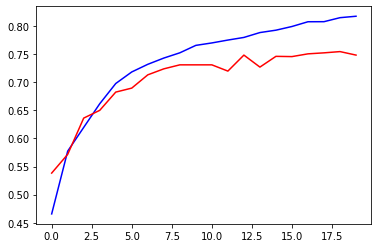

In [36]:
plt.plot(hist.history['accuracy'], c='b')
plt.plot(hist.history['val_accuracy'], c='r')

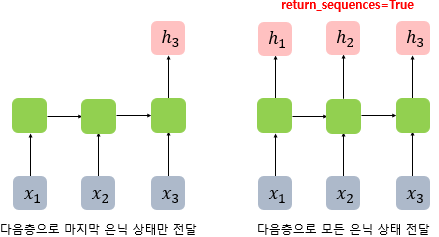

In [38]:
# LSTM 2겹
model = Sequential()
model.add(Embedding(1000,30))
model.add(Dropout(0.5))
# Conv1D : 단방향 convolution
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
# return_sequences=True : 그 다음 LSTM이 값을 전달 받는다.
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 30)          30000     
                                                                 
 dropout_3 (Dropout)         (None, None, 30)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          9664      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, None, 100)         66000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                      

In [39]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
hist = model.fit(x_train_seq.astype(float), y_train_oh, epochs=20, batch_size=20, validation_data=(x_test_seq.astype(float), y_test_oh))

Epoch 1/20
450/450 [==============================] - 20s 36ms/step - loss: 2.2550 - accuracy: 0.4311 - val_loss: 1.8260 - val_accuracy: 0.5147
Epoch 2/20
450/450 [==============================] - 15s 34ms/step - loss: 1.8006 - accuracy: 0.5387 - val_loss: 1.7317 - val_accuracy: 0.5601
Epoch 3/20
450/450 [==============================] - 15s 34ms/step - loss: 1.6979 - accuracy: 0.5779 - val_loss: 1.6631 - val_accuracy: 0.5663
Epoch 4/20
450/450 [==============================] - 15s 34ms/step - loss: 1.6065 - accuracy: 0.5934 - val_loss: 1.6103 - val_accuracy: 0.5637
Epoch 5/20
450/450 [==============================] - 15s 34ms/step - loss: 1.5496 - accuracy: 0.5981 - val_loss: 1.5537 - val_accuracy: 0.5966
Epoch 6/20
450/450 [==============================] - 16s 35ms/step - loss: 1.5044 - accuracy: 0.6084 - val_loss: 1.5177 - val_accuracy: 0.6011
Epoch 7/20
450/450 [==============================] - 15s 34ms/step - loss: 1.4693 - accuracy: 0.6216 - val_loss: 1.5156 - val_accuracy:

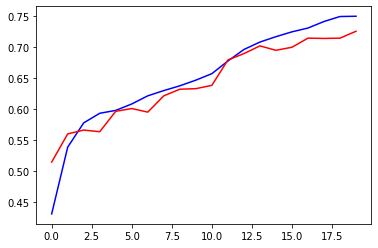

In [42]:
plt.plot(hist.history['accuracy'], c='b')
plt.plot(hist.history['val_accuracy'], c='r')